### analyse buurt-data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
totale_dataset = pd.read_excel('../data/kwb-2022.xlsx')
# totale_dataset = totale_dataset.loc[totale_dataset['gm_naam'] == 'Rotterdam']

In [3]:
# totale_dataset.columns.to_list()

In [4]:
locatie_columns_1 = ['gwb_code_10', 'gwb_code_8', 'regio', 'gm_naam', 'recs', 'gwb_code', 'ind_wbi']
locatie_columns_2 = ['gwb_code_10', 'regio', 'gm_naam', 'recs', 'gwb_code', 'ind_wbi']

totale_dataset[locatie_columns_1].head()

,gwb_code_10,gwb_code_8,regio,gm_naam,recs,gwb_code,ind_wbi
0,NL00,0,Nederland,Nederland,Land,NL00,.
1,GM0014,14,Groningen,Groningen,Gemeente,GM0014,1
2,WK001400,1400,Centrum,Groningen,Wijk,WK001400,1
3,BU00140000,140000,Binnenstad-Noord,Groningen,Buurt,BU00140000,1
4,BU00140001,140001,Binnenstad-Zuid,Groningen,Buurt,BU00140001,1


In [5]:
# totale_dataset['regio_gm_naam'] = totale_dataset['regio'] + ' ' + totale_dataset['gm_naam']

In [6]:
buurten = totale_dataset.loc[totale_dataset['recs'] == 'Buurt']
# buurten[locatie_columns_2]

In [7]:
# get gemeente-code for each buurt
gemeente_code = totale_dataset[['gwb_code_10', 'gm_naam', 'recs']]
gemeente_code = gemeente_code.loc[gemeente_code['recs'] == 'Gemeente']
gemeente_code = gemeente_code[['gwb_code_10', 'gm_naam']]
gemeente_code = gemeente_code.rename({'gwb_code_10' : 'gwb_code_10_gm'}, axis=1)
gemeente_code


,gwb_code_10_gm,gm_naam
1,GM0014,Groningen
172,GM0034,Almere
482,GM0037,Stadskanaal
515,GM0047,Veendam
536,GM0050,Zeewolde
...,...,...
17480,GM1978,Molenlanden
17615,GM1979,Eemsdelta
17727,GM1980,Dijk en Waard
17822,GM1982,Land van Cuijk


In [8]:
# merge gemeente code for map
buurten = buurten.reset_index().merge(gemeente_code, on='gm_naam').set_index('gwb_code_10_gm')
buurten

,index,gwb_code_10,gwb_code_8,regio,gm_naam,recs,gwb_code,ind_wbi,a_inw,a_man,...,g_afs_kv,g_afs_sc,g_3km_sc,a_opp_ha,a_lan_ha,a_wat_ha,pst_mvp,pst_dekp,ste_mvs,ste_oad
gwb_code_10_gm,,,,,,,,,,,,,,,,,,,,,
GM0014,3,BU00140000,140000,Binnenstad-Noord,Groningen,Buurt,BU00140000,1,4480,2335,...,.,.,.,39,37,2,9712,1,1,6712
GM0014,4,BU00140001,140001,Binnenstad-Zuid,Groningen,Buurt,BU00140001,1,6630,3565,...,.,.,.,59,55,4,9711,1,1,6417
GM0014,5,BU00140002,140002,Binnenstad-Oost,Groningen,Buurt,BU00140002,1,4150,2185,...,.,.,.,29,27,2,9711,3,1,6151
GM0014,6,BU00140003,140003,Binnenstad-West,Groningen,Buurt,BU00140003,1,1710,950,...,.,.,.,11,10,1,9718,1,1,6369
GM0014,7,BU00140004,140004,Noorderplantsoen,Groningen,Buurt,BU00140004,1,10,5,...,.,.,.,20,19,0,9717,2,1,6311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GM1991,17998,BU19910603,19910603,Oventje,Maashorst,Buurt,BU19910603,2,480,255,...,.,.,.,237,237,0,5411,1,5,63
GM1991,17999,BU19910604,19910604,Verspreide huizen Trent-Graspeel,Maashorst,Buurt,BU19910604,2,375,195,...,.,.,.,639,639,0,5411,1,5,66
GM1991,18000,BU19910605,19910605,Verspreide huizen Zevenhuis,Maashorst,Buurt,BU19910605,2,365,220,...,.,.,.,755,753,2,5411,1,5,145


In [9]:
bevolking_columns =  ['a_inw', 'a_man', 'a_vrouw', 'a_00_14', 'a_15_24', 'a_25_44', 'a_45_64', 'a_65_oo', 'a_ongeh', 'a_gehuwd',
 'a_gesch', 'a_verwed', 'a_w_all', 'a_nw_all', 'a_marok', 'a_antaru', 'a_suri', 'a_tur', 'a_ov_nw', 'a_hh', 'a_1p_hh', 'a_hh_z_k', 'a_hh_m_k', 'g_hhgro', 'bev_dich']

In [10]:
buurten_bevolking = buurten[bevolking_columns]
buurten_bevolking.head()

,a_inw,a_man,a_vrouw,a_00_14,a_15_24,a_25_44,a_45_64,a_65_oo,a_ongeh,a_gehuwd,...,a_antaru,a_suri,a_tur,a_ov_nw,a_hh,a_1p_hh,a_hh_z_k,a_hh_m_k,g_hhgro,bev_dich
gwb_code_10_gm,,,,,,,,,,,,,,,,,,,,,
GM0014,4480,2335,2145,75,2190,1465,465,290,3925,335,...,40,45,30,355,3635,2985,550,95,"1,2",12085
GM0014,6630,3565,3065,115,3160,2205,670,485,5815,470,...,90,80,50,625,5375,4430,805,140,"1,2",12037
GM0014,4150,2185,1965,120,1765,1435,455,375,3560,340,...,70,45,30,450,3285,2615,540,135,"1,3",15484
GM0014,1710,950,765,45,685,660,150,175,1435,185,...,5,10,15,145,1370,1095,230,45,"1,3",17536
GM0014,10,5,5,0,5,0,5,5,5,5,...,0,0,0,0,5,5,0,5,"1,8",.


In [11]:
## aantal inwoners per buurt
import geopandas as gpd

In [12]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [13]:
# Retrieve data with municipal boundaries from PDOK
geodata_url = 'https://geodata.nationaalgeoregister.nl/cbsgebiedsindelingen/wfs?request=GetFeature&service=WFS&version=2.0.0&typeName=cbs_gemeente_2022_gegeneraliseerd&outputFormat=json'
municipal_boundaries = gpd.read_file(geodata_url)

In [14]:
municipal_boundaries.head()

,id,statcode,statnaam,jrstatcode,rubriek,geometry
0,cbs_gemeente_2022_gegeneraliseerd.1,GM0014,Groningen,2022GM0014,gemeente,"MULTIPOLYGON (((245194.691 592594.007, 245344...."
1,cbs_gemeente_2022_gegeneraliseerd.2,GM0034,Almere,2022GM0034,gemeente,"MULTIPOLYGON (((146891.056 493291.709, 147422...."
2,cbs_gemeente_2022_gegeneraliseerd.3,GM0037,Stadskanaal,2022GM0037,gemeente,"MULTIPOLYGON (((263763.866 566430.392, 263988...."
3,cbs_gemeente_2022_gegeneraliseerd.76,GM0293,Westervoort,2022GM0293,gemeente,"MULTIPOLYGON (((195411.288 439404.042, 195099...."
4,cbs_gemeente_2022_gegeneraliseerd.4,GM0047,Veendam,2022GM0047,gemeente,"MULTIPOLYGON (((256231.909 572319.213, 258595...."


<AxesSubplot: >

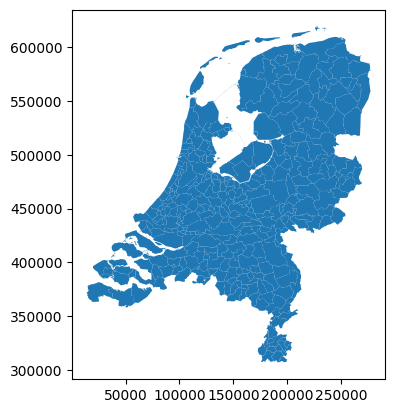

In [15]:
municipal_boundaries.plot()

In [16]:
# # Link data from Statistics Netherlands to geodata
# municipal_boundaries_set = pd.merge(municipal_boundaries, data,
#                                left_on = "statcode", 
#                                right_on = "Codering_3")

In [17]:
# buurten_bevolking = pd.DataFrame(buurten_bevolking.reset_index())
# buurten_bevolking['gwb_code_10_gm'] = buurten_bevolking['gwb_code_10_gm'].astype(str)
# buurten_bevolking

In [18]:
# # Link data from Statistics Netherlands to geodata
# municipal_boundaries_set = pd.merge(municipal_boundaries, buurten_bevolking,
#                                left_on = "statcode", 
#                                right_on = "gwb_code_10_gm")

In [19]:
# municipal_boundaries_set['a_inw']

In [20]:
# municipal_boundaries_set['a_inw'] = municipal_boundaries_set['a_inw']

In [21]:
# municipal_boundaries_set.sort_values(by='a_inw', ascending=False).head(10)

In [22]:
# municipal_boundaries_set['a_inw'].describe()

In [23]:
# municipal_boundaries_set.head()

In [24]:
# gem_a_iwn = buurten_bevolking.groupby('gwb_code_10_gm')['a_inw'].mean()
# gem_vrouw_dich = buurten_bevolking.groupby('gwb_code_10_gm')['a_vrouw'].mean().reset_index()
# max_bew_dich = buurten_bevolking.groupby('gwb_code_10_gm')['bev_dich'].max().reset_index()

In [25]:
gem_a_iwn = pd.DataFrame(buurten_bevolking.groupby('gwb_code_10_gm')['a_inw'].mean())
gem_vrouw = pd.DataFrame(buurten_bevolking.groupby('gwb_code_10_gm')['a_vrouw'].mean())
max_bew_dich = pd.DataFrame(buurten_bevolking.groupby('gwb_code_10_gm')['bev_dich'].max())

In [26]:
municipal_boundaries = municipal_boundaries.merge(gem_a_iwn, left_on='statcode', right_on='gwb_code_10_gm')
municipal_boundaries = municipal_boundaries.merge(gem_vrouw, left_on='statcode', right_on='gwb_code_10_gm')
municipal_boundaries = municipal_boundaries.merge(max_bew_dich, left_on='statcode', right_on='gwb_code_10_gm')
municipal_boundaries

,id,statcode,statnaam,jrstatcode,rubriek,geometry,a_inw,a_vrouw,bev_dich
0,cbs_gemeente_2022_gegeneraliseerd.1,GM0014,Groningen,2022GM0014,gemeente,"MULTIPOLYGON (((245194.691 592594.007, 245344....",1566.066667,786.866667,9962
1,cbs_gemeente_2022_gegeneraliseerd.2,GM0034,Almere,2022GM0034,gemeente,"MULTIPOLYGON (((146891.056 493291.709, 147422....",915.126050,460.924370,9949
2,cbs_gemeente_2022_gegeneraliseerd.3,GM0037,Stadskanaal,2022GM0037,gemeente,"MULTIPOLYGON (((263763.866 566430.392, 263988....",1179.629630,597.222222,805
3,cbs_gemeente_2022_gegeneraliseerd.76,GM0293,Westervoort,2022GM0293,gemeente,"MULTIPOLYGON (((195411.288 439404.042, 195099....",2490.833333,1263.333333,5565
4,cbs_gemeente_2022_gegeneraliseerd.4,GM0047,Veendam,2022GM0047,gemeente,"MULTIPOLYGON (((256231.909 572319.213, 258595....",1615.000000,807.647059,958
...,...,...,...,...,...,...,...,...,...
340,cbs_gemeente_2022_gegeneraliseerd.341,GM1978,Molenlanden,2022GM1978,gemeente,"MULTIPOLYGON (((123712.581 439998.364, 124188....",391.666667,193.684211,913
341,cbs_gemeente_2022_gegeneraliseerd.342,GM1979,Eemsdelta,2022GM1979,gemeente,"MULTIPOLYGON (((253004.946 603887.823, 253797....",493.641304,245.869565,993
342,cbs_gemeente_2022_gegeneraliseerd.343,GM1980,Dijk en Waard,2022GM1980,gemeente,"MULTIPOLYGON (((114341.609 526288.388, 114422....",1270.797101,633.188406,97
343,cbs_gemeente_2022_gegeneraliseerd.344,GM1982,Land van Cuijk,2022GM1982,gemeente,"MULTIPOLYGON (((181384.076 418252.229, 182100....",898.118812,444.158416,998


In [27]:
# fig, ax = plt.subplots(figsize=(8,6))
# plt.scatter( municipal_boundaries['statnaam'], municipal_boundaries['bev_dich'])
# plt.show()

<AxesSubplot: >

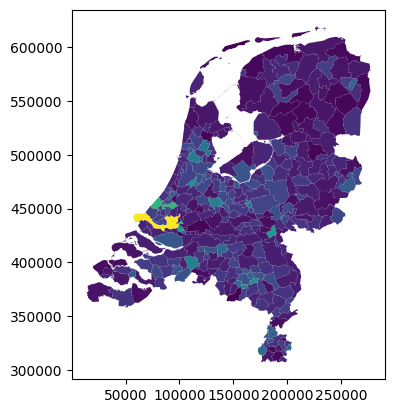

In [28]:
municipal_boundaries.plot(column='a_inw')

<AxesSubplot: >

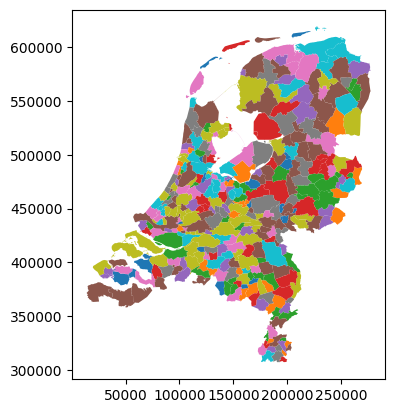

In [29]:
municipal_boundaries.plot(column='bev_dich')

<AxesSubplot: >

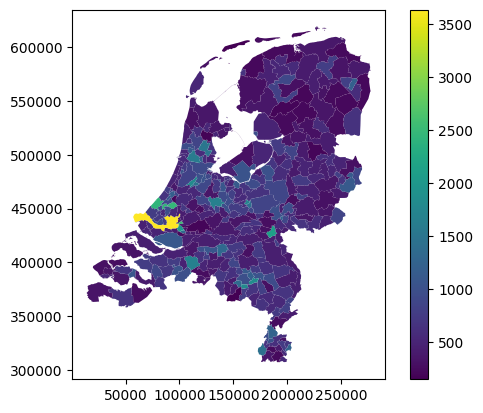

In [30]:
municipal_boundaries.plot(column='a_vrouw', legend=True)

#### create businessrules

In [31]:
municipal_boundaries.head()

,id,statcode,statnaam,jrstatcode,rubriek,geometry,a_inw,a_vrouw,bev_dich
0,cbs_gemeente_2022_gegeneraliseerd.1,GM0014,Groningen,2022GM0014,gemeente,"MULTIPOLYGON (((245194.691 592594.007, 245344....",1566.066667,786.866667,9962
1,cbs_gemeente_2022_gegeneraliseerd.2,GM0034,Almere,2022GM0034,gemeente,"MULTIPOLYGON (((146891.056 493291.709, 147422....",915.126050,460.924370,9949
2,cbs_gemeente_2022_gegeneraliseerd.3,GM0037,Stadskanaal,2022GM0037,gemeente,"MULTIPOLYGON (((263763.866 566430.392, 263988....",1179.629630,597.222222,805
3,cbs_gemeente_2022_gegeneraliseerd.76,GM0293,Westervoort,2022GM0293,gemeente,"MULTIPOLYGON (((195411.288 439404.042, 195099....",2490.833333,1263.333333,5565
4,cbs_gemeente_2022_gegeneraliseerd.4,GM0047,Veendam,2022GM0047,gemeente,"MULTIPOLYGON (((256231.909 572319.213, 258595....",1615.000000,807.647059,958


In [105]:
import random
import numpy as np

# create random score for neighborhoods

municipal_boundaries['score'] = np.random.randint(1,4, size=len(municipal_boundaries))

In [106]:
municipal_boundaries['score'].value_counts()

3    120
2    118
1    107
Name: score, dtype: int64

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import joblib

### https://www.datathrillz.com/considerations-for-building-a-rules-engine-in-python/


In [108]:
municipal_boundaries.head()

,id,statcode,statnaam,jrstatcode,rubriek,geometry,a_inw,a_vrouw,bev_dich,score
0,cbs_gemeente_2022_gegeneraliseerd.1,GM0014,Groningen,2022GM0014,gemeente,"MULTIPOLYGON (((245194.691 592594.007, 245344....",1566.066667,786.866667,9962.0,1
1,cbs_gemeente_2022_gegeneraliseerd.2,GM0034,Almere,2022GM0034,gemeente,"MULTIPOLYGON (((146891.056 493291.709, 147422....",915.126050,460.924370,9949.0,1
2,cbs_gemeente_2022_gegeneraliseerd.3,GM0037,Stadskanaal,2022GM0037,gemeente,"MULTIPOLYGON (((263763.866 566430.392, 263988....",1179.629630,597.222222,805.0,2
3,cbs_gemeente_2022_gegeneraliseerd.76,GM0293,Westervoort,2022GM0293,gemeente,"MULTIPOLYGON (((195411.288 439404.042, 195099....",2490.833333,1263.333333,5565.0,1
4,cbs_gemeente_2022_gegeneraliseerd.4,GM0047,Veendam,2022GM0047,gemeente,"MULTIPOLYGON (((256231.909 572319.213, 258595....",1615.000000,807.647059,958.0,2


In [109]:
municipal_boundaries['bev_dich'] = municipal_boundaries['bev_dich'].astype(float)

X = municipal_boundaries[['a_inw', 'a_vrouw', 'bev_dich']]
y = municipal_boundaries['score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [129]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
        ('scaler', StandardScaler()), 
        ('rf', RandomForestClassifier())])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('rf', RandomForestClassifier())])

In [130]:
pipeline.score(X_test, y_test)

0.463768115942029

In [131]:
# save the model to disk
filename = '../data/finalized_model.sav'
joblib.dump(pipeline, filename)

['../data/finalized_model.sav']

In [133]:
# test buurt
input_data = [23, 345,345]

# predict
result = pipeline.predict([input_data])

print(f'the predicted score is {result}')

the predicted score is [3]


/Users/nellekesmits/Documents/projects/notebook.businessrules/venv/lib/python3.8/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
